# Installing dependencies

In [47]:
!pip install pandas numpy scikit-learn seaborn matplotlib joblib

# importing necessary files and loading the dataset

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import joblib

dataset = pd.read_csv("/home/shahzaib/work/email-spam-detection/spam_ham_dataset.csv")


# data pre-processing

In [13]:
# taking general overview of data
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
# getting overall picture of data
dataset.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [15]:
#removing unnecessary columns
dataset = dataset.drop(columns=['label_num', "Unnamed: 0"])
dataset.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


# creating the train-test split and feeding it into the model

In [ ]:
#creating the testing and training data
x_train,x_test,y_train,y_test = train_test_split(dataset["text"], dataset["label"], test_size= 0.2, random_state=0, shuffle= True)

3628    Subject: meter 986296\r\nscherlyn , per our co...
2491    Subject: natural gas nomination for 08 / 00\r\...
3262    Subject: cleburne outage\r\ngentlemen ,\r\ni w...
2972    Subject: daren ,\r\nthe firm trading waha book...
2481    Subject: re : mon , 2 feb 2004 03 : 16 : 16 - ...
Name: text, dtype: object

In [45]:
print(x_train.count())
print(x_test.count())

4136
1035


In [23]:
model = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators=100, n_jobs= -1))])

In [24]:
model.fit(x_train,y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
predictions = model.predict(x_test)

# Model evaluation

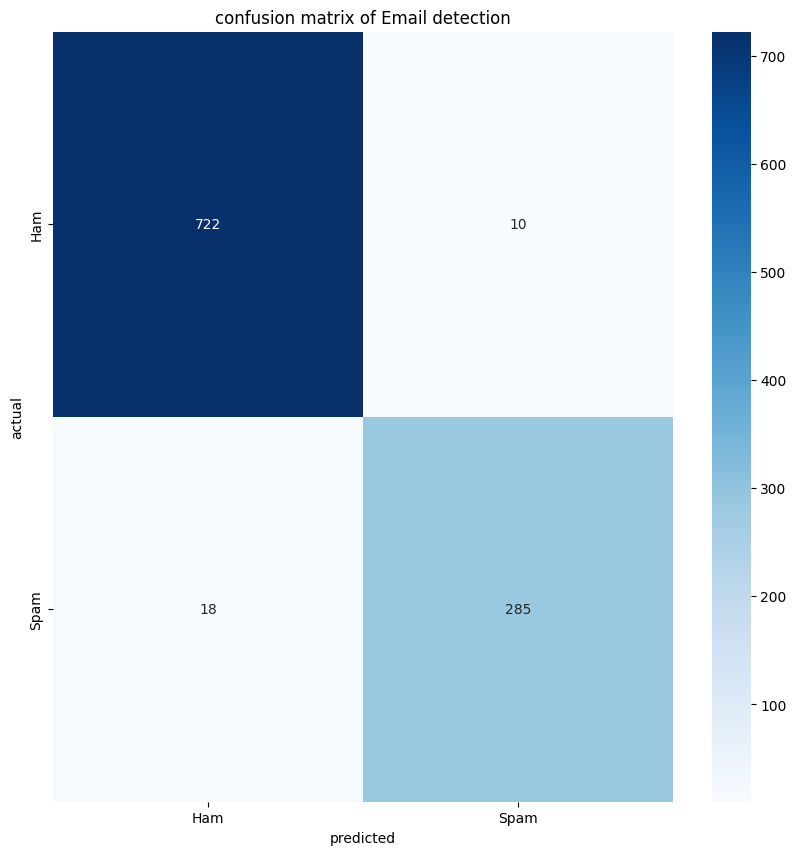

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions), annot= True, fmt= "d" ,cmap="Blues", xticklabels=["Ham", "Spam"],
             yticklabels=["Ham", "Spam"])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix of Email detection")
plt.show()

In [ ]:
print(accuracy_score(y_test,predictions))

0.9729468599033816


# Saving the model

In [49]:
joblib.dump(model,"email-detection.pkl")

['email-detection.pkl']